In [205]:
2

2

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Observación general de datos

In [207]:
# Opening the dataset with pandas
train = pd.read_csv(r'C:\Users\Oscar Marino\Documents\Henry\DFT 04 - Henry Course\Proyectos Individuales\P2 ML\Datathon\properties_colombia_train.csv')

In [208]:
train.head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [209]:
# The dataset has 197549 rows and 27 columns.
train.shape

(197549, 27)

In [210]:
# As we can see several columns from the dataset have null values. They will be studied with more detail 
# in order to understand how to manage them.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

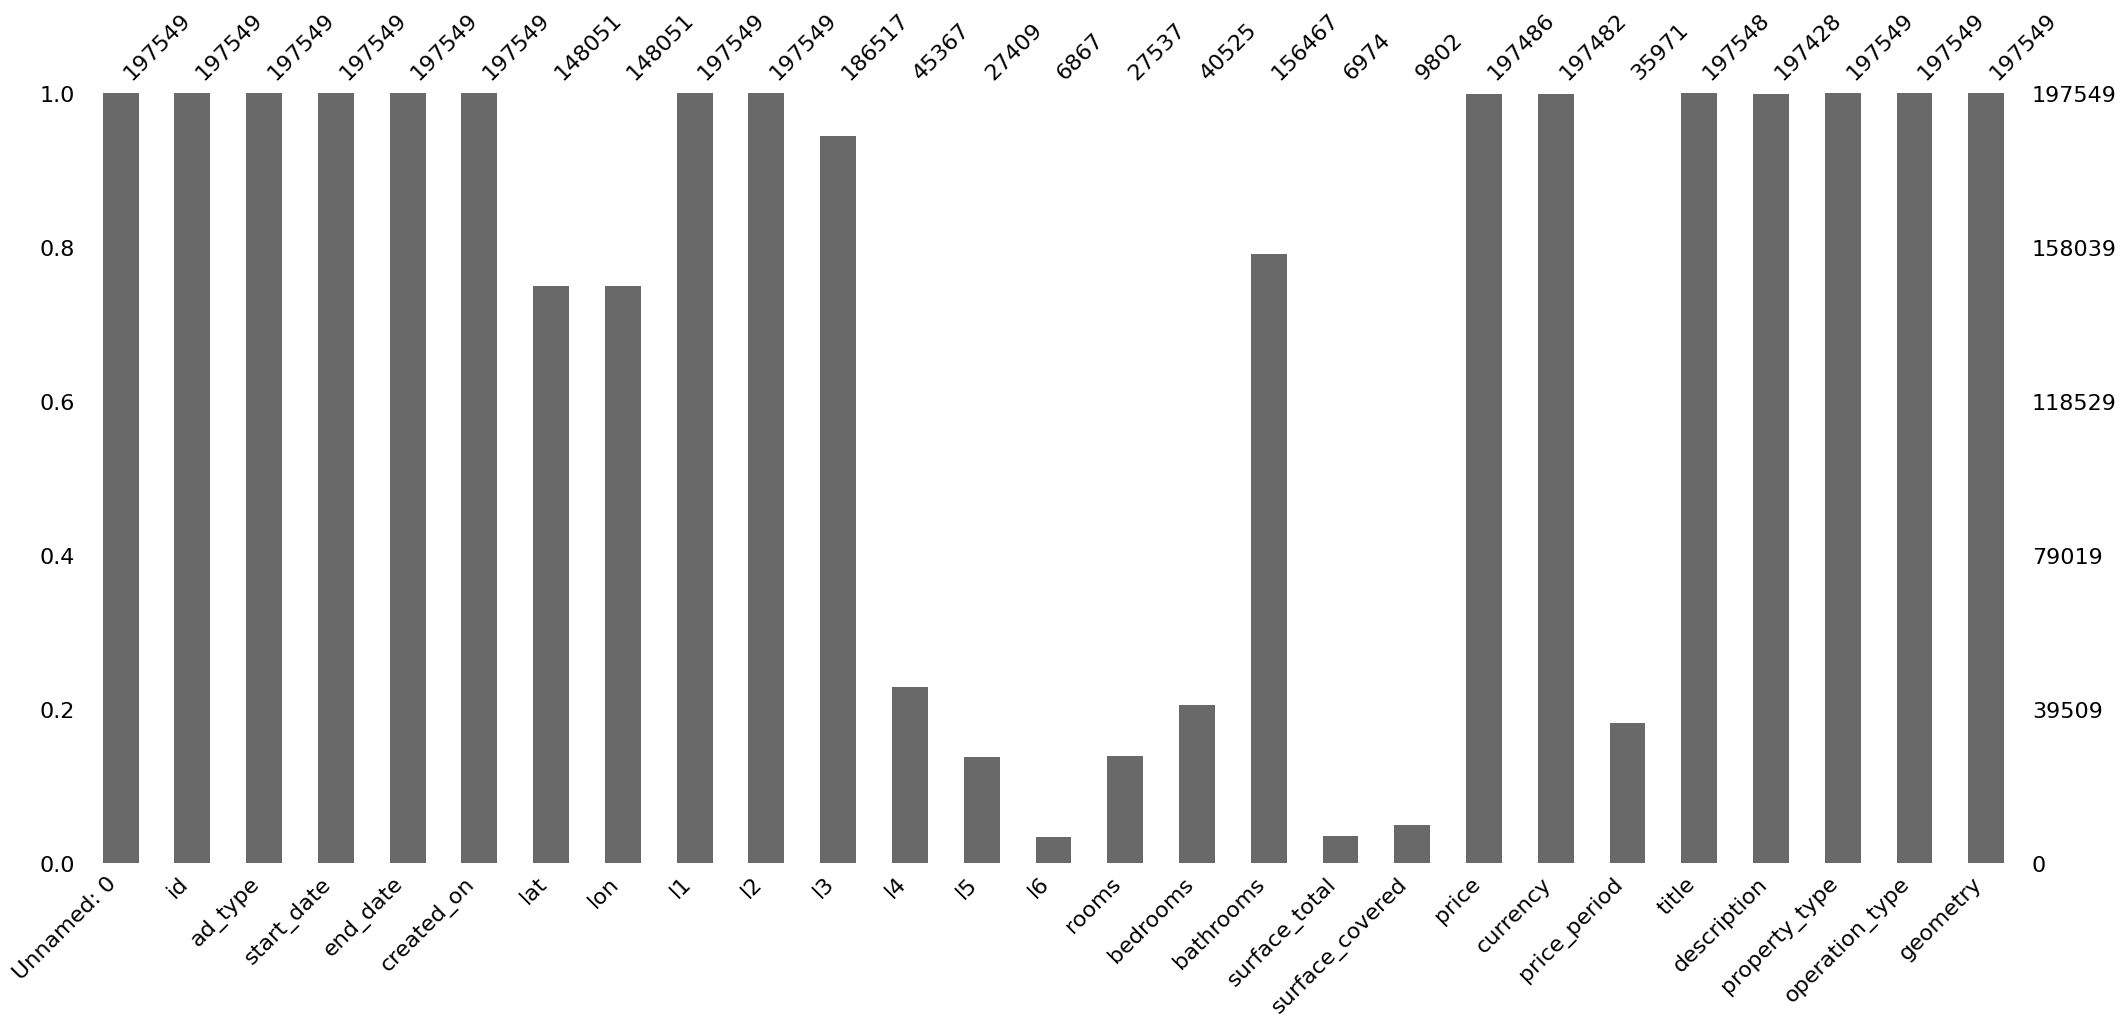

In [211]:
# We will use the missingno library to see the null values in an illustrative way.
import missingno as msno

msno.bar(train)
plt.show()

In [212]:
# In order to clean the dataframe some columns will be deleted because different factors that are explained below:

# Unnamed: 0: As this column has no description and is imported when opening the data we proceed to erase it.

# id: Is the value to identify each property and does not have incidence in the price of properties.

train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [213]:
# A first step into the EDA (exploratory data analysis) is to verify if we have instances that are repeted.
# According to the following code we do not have properties that are duplicated.

# We can see that if we take out the 'id' and 'Unnamed: 0' columns, there are several entries with exactly the same data. This is because some properties are
# re-published when the publication period ends.

# As we can see, we have 504 properties that have been re-published, increasing the data with repeated records. 
train.duplicated().value_counts()

False    197045
True        504
dtype: int64

In [214]:
#We obtain the index of the properties that are duplicated and use them to drop the repeated records.
repeated_properties = train[train.duplicated() == True].index
train.drop(repeated_properties, axis = 0, inplace=True)

# After deleting the dupliacated records we have 197045 rows.
train.shape

(197045, 25)

In [215]:
# We reset the index of the dataframe to avoid future problems.
train.reset_index(drop=True, inplace=True)

## Null Values Transformation/Imputation

In [216]:
# Ad the ad_type column just have one value for all the records we proceed to erase it as it is not meaningful for the model.
train.ad_type.value_counts()
train.drop('ad_type', axis=1, inplace=True)

In [217]:
# As the start_date column and the created_on columns are the same we proceed to drop one of the 2 columns
train[train.start_date != train.created_on]
train.drop('created_on',axis=1,inplace=True)

In [218]:
# Then we transform the date columns to datetime variables.
train['start_date'] = train['start_date'].apply(lambda x: pd.to_datetime(x))

# For the end_date that has dates with 9999 as year it is not possible to simply change it to datetime type. Therefore, some different transformation has to be executed.
# As these variables are not going to be used in the ML model nor influence it, these values are arbitrary changed for the 2022 year. 
train['end_date'] = train['end_date'].apply(lambda x: pd.to_datetime(x) if x[:4]!='9999'else pd.to_datetime(x.replace("9999","2022")))

In [219]:
# In order to clean the dataframe some columns will be deleted because different factors that are explained below:

# operation_type : In this column all the records are Volombia.As is just one value it does not influence or affect the model.

train.drop([ 'operation_type'], axis=1, inplace=True)

In [220]:
# Renaming some columns for a suitable name
train.rename(columns={'l1':'pais', 'l2':'departamento', 'l3':'municipio', 'l4':'sector', 'l5':'sector_bogota', 'lat':'latitud', 'lon':'longitud'}, inplace=True)

#### Latitude and longitude columns (latitud, longitud)

In [221]:
# To fill the empty latitudes and longitudes in the dataframe we are going to use the library Geopy as the library allows to locate the coordinates of addresses, cities, countries,
# and landmarks across the globe using third-party geocoders and other data sources.

# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API: Nominatim indexes named features within the OpenStreetMap.
geolocator = Nominatim(user_agent="MyApp")

# Creation of a variable with location function. The variable will return geographic data from the inserted record. 
# --> Medellín as an example.
location = geolocator.geocode('Medellín')

# Using the latitude and longitude columns from the data returned, we obtain this values for Medellín
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)
print(location)

The latitude of the location is:  6.2443382
The longitude of the location is:  -75.573553
Medellín, Valle de Aburrá, Antioquia, 0500, Colombia


In [222]:
# To do this we are going to use the pais and departamento colums as they are complete columns.

# Using concatenate strings we create a variable containing records made of the departamento and country.
localization = train.departamento.str.cat(train.pais, sep=', ')
train['localization'] = localization

# Then, we obtain a list of unique records in the column departamento. This list will be used to obtain the latitute and longitud of the different departments (departamentos) of our data.
# We use the pais column in the concatenation in order to get coordinates from Colombia and not from another country with locations with the same name.
departamento = list(train['departamento'].unique())

# Variable with the unique records of 'departamento, pais' e.g 'Antioquia, Colombia' for which the latitude and longitude will be found.
list_unique_locations = list(train['localization'].unique())

# Creation of empty list to save the latitude and longitude records.
list_coor_lat = []
list_coor_lon = []

# for cicle to obtain the atitude and longitude of the unique location records. The unique locations go through the location geolocator to obtain the geographic area.
for i in list_unique_locations:
    location = geolocator.geocode(i)
    list_coor_lat.append(location.latitude)
    list_coor_lon.append(location.longitude)

In [223]:
# with the previous records we create a Dataframe containing the unique location records and its latitude and longitude.
data = pd.DataFrame()
data['localization'] = departamento
data['latitude_l'] = list_coor_lat
data['longitude_l'] = list_coor_lon

# Before changing this empty values we have 49439 records without data for 'latitud' and 'longitud' columns.
train[train.latitud.isnull() == True].shape

(49439, 23)

In [224]:
# Using the train and data dataframes we are going to fill the empty records with geographic information gotten in the previous steps.

# We do this with a for cicle that iterates train.latitud, if there is an NaN space we enter anothe for cicle that iterates data['localization'].

# If the record in the train.departamento column match the departamento in the dataframe Data (the dataframe with geographic information),
# the empty record in train.latitud and train.longitud will be inputed with the 'latitud' and 'longitud' from the correct departamet (departamento)
# from the data dataframe.

# first for cycle.
for index_r, record in enumerate(train.latitud):
    
    # If the record is NaN in train.latitud we continue with another for cycle.
    if np.isnan(train.latitud[index_r]) and np.isnan(train.longitud[index_r]):
        
        # second for cycle.
        for index_d, departamento in enumerate(data['localization']):
            
            # If the records match, the NaN records are completed with the geographic information of the correct department.
            if train.departamento[index_r] == departamento:
                
                train['latitud'][index_r] = data.latitude_l[index_d]
                train['longitud'][index_r] = data.longitude_l[index_d]

# we chech that the NaN records are 0 now.
train[train.latitud.isnull() == True].shape

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\28429328.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['latitud'][index_r] = data.latitude_l[index_d]
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\28429328.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['longitud'][index_r] = data.longitude_l[index_d]


(0, 23)

In [225]:
# After the previuos steps we do not have empty records for the columns latitud and longitud anymore.
train[train.latitud.isnull() == True].shape

(0, 23)

In [226]:
# We delete the column train.localization because we dont need it after.
train.drop('localization', axis=1, inplace=True)

In [227]:
# Confirmation of existance of duplicated values
train.duplicated().value_counts()

False    197045
dtype: int64

#### Designation of target column

In [228]:
# From the 197549 records there are 8 records with currency in USD. This 8 records accout for less than 0.5 % of the data, therefore, they represent a diminute fraction of the properties. Hence, they are dropped because
# they do not influence the dataset and make noise.

# Using the index of the records with USD as currency we proceed to clean de Train Dataset.
train.drop((train[train.currency == 'USD'].index), axis=0, inplace=True)

# We assing a variable with the mean price of the properties to know if they are expensive o cheap.
avg_price = train.price.mean()

# Cretion of variable target to fill the dataframe
target = train.price.apply(lambda x: 1 if x >= avg_price else 0) # target = train.price.apply(lambda x: 1 if x > train.price.mean() else 0)

# It works without assingning the mean to a variable but it takes longer.
# target = train.price.apply(lambda x: 1 if x > train.price.mean() else 0)

# Creation of the target column in the dataframe
train['target'] = target
train.head(3)

,start_date,end_date,latitud,longitud,pais,departamento,municipio,sector,sector_bogota,l6,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,geometry,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0


In [229]:
# Counting how many expensive = 1 and cheap = 0 properties we have.
train['target'].value_counts()

0    150793
1     46244
Name: target, dtype: int64

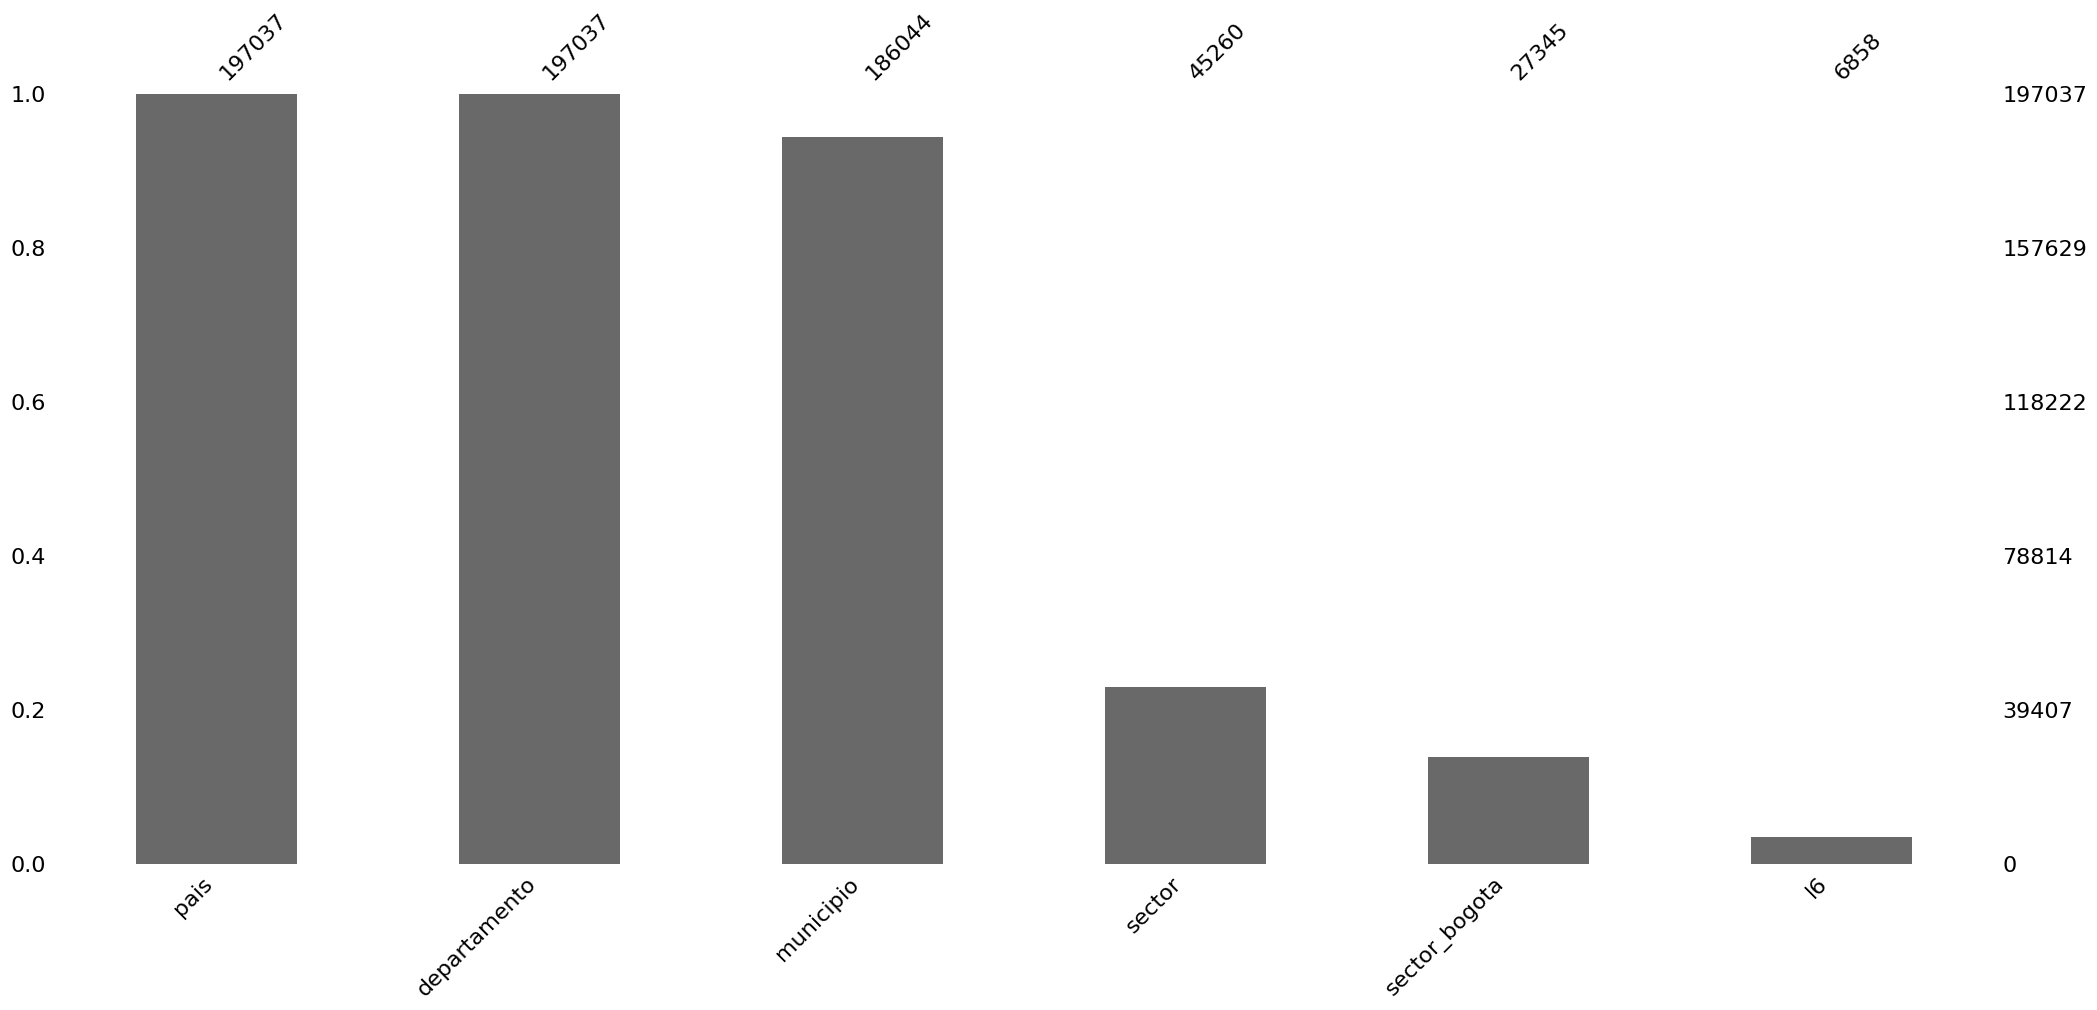

In [230]:
msno.bar(train[['pais', 'departamento', 'municipio', 'sector', 'sector_bogota', 'l6']])
plt.show()

#### Latitude and longitude properties that are whitin Colombia

In [231]:
# Usign the geopandas and ploty libraries we are going to check if we have properties that are out of Colombia
import geopandas as gpd
import plotly.express as px

In [232]:
# First we create a copy of the original dataframe without the null spaces in the column geometry
train_coor = train[train.geometry != 'POINT EMPTY']

# At the same time we save the index of the records that has no information about its coordinates in order not to lose valuable.
records_no_coordinates = train[train.geometry == 'POINT EMPTY'].index

# Creation of a variable with an array designed to store shapely geometry objects.
gs = gpd.GeoSeries.from_wkt(train_coor.geometry)

# Creation of a Dataframe with a column geometry. The geometry variable is the coordinates from our properties in a 2 dimensional coordinate system
# This Dataframe will be used to plot the map with the location of properties in colombia
train_geo = gpd.GeoDataFrame(train_coor, geometry=gs)

# As we alredy have the latitude (column lat) and longitud (column lon) as points in the column geometry, there is no neccesity for them in the dataframe

In [233]:
# Get built in dataset from geopandas with information regarding geographic limits of countries.

world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'Colombian properties Dataset')

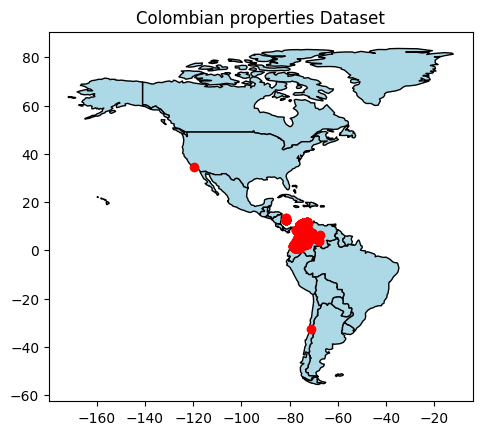

In [234]:
# For plotting the map:

# Map configuration
axis = world_data[(world_data.continent == 'South America') | (world_data.continent == 'North America')].plot(color='lightblue', edgecolor = 'black')

# Call a plot function from matplot lib

# Map with the properties where we can see that we have properties out of Colombia. Some of them are in Argentina and USA. The properties nearby Central America are in San Andres and Providencia,
# that are small islands that belong to Colombia.
train_geo.plot(ax = axis, color = 'red') # Creation of the points with the coordinates.
plt.title('Colombian properties Dataset')

In [235]:
# From the previous graph we can see that above 20° and -20° latitud, are the properties outside Colombia. As they represent just a minimum part of the data (less than 1%) we proceed to eliminate these records.
train_coor[(train_coor.latitud <= -20) | (train_coor.latitud >= 20)].index

# using the index of the records outside Colombia we proceed to drop them.
train.drop((train_coor[(train_coor.latitud <= -20) | (train_coor.latitud >= 20)].index), inplace = True)

Text(0.5, 1.0, 'Colombian properties Dataset')

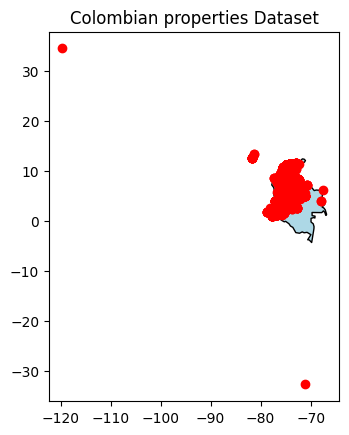

In [236]:
# In order for the user to see the records outside Colombia more clearly, we print another illustration
# clearer for the viewer.
axis = world_data[(world_data.name == 'Colombia')].plot(color='lightblue', edgecolor = 'black')
train_geo.plot(ax = axis,  color = 'red',figsize=(20,20))
plt.title('Colombian properties Dataset')

In [237]:
# Dataframe Checkpoint
df = train.copy()

In [238]:
# In order to clean the dataframe some columns will be deleted because different factors that are explained below:

# pais: In this column all the records are Colombia.As is just one value it does not influence or affect the model.

# Sector: It is dropped because ???

# sector_bogota: This column is dropped due to it only contains information about Bogotá neighboorhouds, not taking into account information for other municipios (provinces).

# l6: contains a diminute proportion of data that can be used. It was not possible to fill null values with information from the column description, hence, it is eliminated.

# price: column used for calculating the target values. It is not used in the test dataset.

# currency: After deleting the records with values equal to USD, all the records are COP. As is just one value it does not influence or affect the model.

# title: This column was used for completing the columns rooms, bedrooms, bathrooms, surface_total, surface_covered. After that can be deleted.

# description: This column was used for completing the columns rooms, bedrooms, bathrooms, surface_total, surface_covered. After that can be deleted.

# operation_type : In this column all the records are Volombia.As is just one value it does not influence or affect the model.

# geometry: This column has records with information of latitude and longitude 

train.drop(['pais', 'sector', 'sector_bogota', 'l6', 'price', 'currency', 'price_period', 'title', 'description', 'geometry'], axis=1, inplace=True)


#### Null values in 'rooms','bedrooms', 'bathrooms', 'surface_total' and 'surface_covered' columns

In [239]:
# Using an additional dataframe we are going to impute the NaN values with the mean of the the following columns rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
# according to the type of property.
# This is done because a large amount of records are missing and we need to improve the data for the ML model. 
# The imputation is done according to the type of property, that is a column with complete records.
# Using this filtered mean allows us to fill empty spaces with a value more similar than just an average mean.

# Firstly, we create an empty dataframe where we will save the mean vallues.
empty = pd.DataFrame()

# Using the function groupby we obtain the mean for each type of property according to the different columns
empty = train.groupby('property_type').mean()

# The information is saved in the empty dataframe
empty = empty[['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered']].round()

# Checking for the results obtained.
empty

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\2518600482.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  empty = train.groupby('property_type').mean()


,rooms,bedrooms,bathrooms,surface_total,surface_covered
property_type,,,,,
Apartamento,3.0,3.0,2.0,108.0,113.0
Casa,4.0,4.0,3.0,897.0,300.0
Finca,4.0,4.0,4.0,14925.0,30939.0
Local comercial,3.0,1.0,2.0,180.0,160.0
Lote,3.0,1.0,2.0,8979.0,13101.0
Oficina,3.0,1.0,2.0,144.0,121.0
Otro,6.0,5.0,3.0,991.0,1010.0
Parqueadero,4.0,2.0,NaN,496.0,545.0


In [240]:
# Using the dataframe Empty allow us to obtain the mean values for the the type of property according to the different columns.
# This values are kept in separate variables to use them to replace records with NaN values.

# Mean values for rooms by the type of property
r_a     = empty.iloc[0,0]
r_c     = empty.iloc[1,0]
r_f     = empty.iloc[2,0]
r_lc    = empty.iloc[3,0]
r_l     = empty.iloc[4,0]
r_o     = empty.iloc[5,0]
r_ot    = empty.iloc[6,0]
r_p     = empty.iloc[7,0]

print('Values for rooms:',r_a,r_c,r_f,r_lc,r_l,r_o,r_ot,r_p)

# Mean values for bedrooms according to the type of property
bed_a     = empty.iloc[0,1]
bed_c     = empty.iloc[1,1]
bed_f     = empty.iloc[2,1]
bed_lc    = empty.iloc[3,1]
bed_l     = empty.iloc[4,1]
bed_o     = empty.iloc[5,1]
bed_ot    = empty.iloc[6,1]
bed_p     = empty.iloc[7,1]

print('Values for bedrooms:',bed_a,bed_c,bed_f,bed_lc,bed_l,bed_o,bed_ot,bed_p)

# Mean values for bathrooms according to the type of property
bath_a     = empty.iloc[0,2]
bath_c     = empty.iloc[1,2]
bath_f     = empty.iloc[2,2]
bath_lc    = empty.iloc[3,2]
bath_l     = empty.iloc[4,2]
bath_o     = empty.iloc[5,2]
bath_ot    = empty.iloc[6,2]
bath_p     = 0 # As parking spots do not have bathrooms according to the data.

print('Values for bathrooms:',bath_a,bath_c,bath_f,bath_lc,bath_l,bath_o,bath_ot,bath_p)

# Mean values for surface_total according to the type of property
surf_to_a     = empty.iloc[0,3]
surf_to_c     = empty.iloc[1,3]
surf_to_f     = empty.iloc[2,3]
surf_to_lc    = empty.iloc[3,3]
surf_to_l     = empty.iloc[4,3]
surf_to_o     = empty.iloc[5,3]
surf_to_ot    = empty.iloc[6,3]
surf_to_p     = empty.iloc[7,3]

print('Values for surface_total:',surf_to_a,surf_to_c,surf_to_f,surf_to_lc,surf_to_l,surf_to_o,surf_to_ot,surf_to_p)

# Mean values for surface_covered according to the type of property
surf_co_a     = empty.iloc[0,4]
surf_co_c     = empty.iloc[1,4]
surf_co_f     = empty.iloc[2,4]
surf_co_lc    = empty.iloc[3,4]
surf_co_l     = empty.iloc[4,4]
surf_co_o     = empty.iloc[5,4]
surf_co_ot    = empty.iloc[6,4]
surf_co_p     = empty.iloc[7,4]

print('Values for surface_covered:',surf_co_a,surf_co_c,surf_co_f,surf_co_lc,surf_co_l,surf_co_o,surf_co_ot,surf_co_p)

Values for rooms: 3.0 4.0 4.0 3.0 3.0 3.0 6.0 4.0
Values for bedrooms: 3.0 4.0 4.0 1.0 1.0 1.0 5.0 2.0
Values for bathrooms: 2.0 3.0 4.0 2.0 2.0 2.0 3.0 0
Values for surface_total: 108.0 897.0 14925.0 180.0 8979.0 144.0 991.0 496.0
Values for surface_covered: 113.0 300.0 30939.0 160.0 13101.0 121.0 1010.0 545.0


In [241]:
# For the column rooms where the record is NaN and in the same row the property_type is 'Apartamento' we are going to insert the value of the mean of rooms for Apartamento:
# We obtain the where the condition is met. It takes around 2 mins.
list_r_a = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Apartamento')].index

# With a for cycle we iterate over the different index that met the condition. The records with this index are changed by the mean.
for i in train[(np.isnan(train.rooms) == True) & (train.property_type == 'Apartamento')].index:
    train.rooms[i] = r_a
    
# The same process is repeated for the other property types ('Casa', 'Finca', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'Parqueadero').

list_r_c = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Casa')].index
for i in list_r_c:
    train.rooms[i] = r_c
    
list_r_f = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Finca')].index
for i in list_r_f:
    train.rooms[i] = r_f
    
list_r_lc = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Local comercial')].index
for i in list_r_lc:
    train.rooms[i] = r_lc
    
list_r_l = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Lote')].index
for i in list_r_l:
    train.rooms[i] = r_l
    
list_r_o = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Oficina')].index
for i in list_r_o:
    train.rooms[i] = r_o
    
list_r_ot = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Otro')].index
for i in list_r_ot:
    train.rooms[i] = r_ot
    
list_r_p = train[(np.isnan(train.rooms) == True) & (train.property_type == 'Parqueadero')].index
for i in list_r_p:
    train.rooms[i] = r_p

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\2774877826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_a
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\2774877826.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_c
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\2774877826.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rooms[i] = r_f
C:\Users\Oscar Ma

In [242]:
train.reset_index(drop = True, inplace=True)

In [243]:
# Later on (after a night of resting :p), it was possible to define another way to do the same process of changing the mean value for each category.

# For the column bedrooms

# We create a counter variable in order to manage the bucle and enter the mean value desired according to each column.
n = 0

# Creation of an iteration over the names of the columns of the Empty Dataframe.
for i in empty.index:
    # Using masks we filter the dataframe Train and obtain the index where the records are Nan and met a condition (type of property).
    list_index = train[(np.isnan(train.bedrooms) == True) & (train.property_type == i)].index
    # Using the index of the records that are NaN and the type of property desired, the value of this records are changed for the mean value of the type of property in the
    # suitable column.
    for j in list_index:
        if n == 0:
            train.bedrooms[j] = bed_a
        elif n == 1:
            train.bedrooms[j] = bed_c
        elif n == 2:
            train.bedrooms[j] = bed_f
        elif n == 3:
            train.bedrooms[j] = bed_lc
        elif n == 4:
            train.bedrooms[j] = bed_l
        elif n == 5:
            train.bedrooms[j] = bed_o
        elif n == 6:
            train.bedrooms[j] = bed_ot 
        elif n == 7:
            train.bedrooms[j] = bed_p
    n += 1


# The same process is repeated for the other columns.

# For the column bathrooms
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.bathrooms) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.bathrooms[j] = bath_a
        elif n == 1:
            train.bathrooms[j] = bath_c
        elif n == 2:
            train.bathrooms[j] = bath_f
        elif n == 3:
            train.bathrooms[j] = bath_lc
        elif n == 4:
            train.bathrooms[j] = bath_l
        elif n == 5:
            train.bathrooms[j] = bath_o
        elif n == 6:
            train.bathrooms[j] = bath_ot 
        elif n == 7:
            train.bathrooms[j] = bath_p
    n += 1
    
# For the column surface_total
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.surface_total) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.surface_total[j] = surf_to_a
        elif n == 1:
            train.surface_total[j] = surf_to_c
        elif n == 2:
            train.surface_total[j] = surf_to_f
        elif n == 3:
            train.surface_total[j] = surf_to_lc
        elif n == 4:
            train.surface_total[j] = surf_to_l
        elif n == 5:
            train.surface_total[j] = surf_to_o
        elif n == 6:
            train.surface_total[j] = surf_to_ot 
        elif n == 7:
            train.surface_total[j] = surf_to_p
    n += 1
    
# For the column surface_covered
n = 0
for i in empty.index:
    list_index = train[(np.isnan(train.surface_covered) == True) & (train.property_type == i)].index
    for j in list_index:
        if n == 0:
            train.surface_covered[j] = surf_co_a
        elif n == 1:
            train.surface_covered[j] = surf_co_c
        elif n == 2:
            train.surface_covered[j] = surf_co_f
        elif n == 3:
            train.surface_covered[j] = surf_co_lc
        elif n == 4:
            train.surface_covered[j] = surf_co_l
        elif n == 5:
            train.surface_covered[j] = surf_co_o
        elif n == 6:
            train.surface_covered[j] = surf_co_ot 
        elif n == 7:
            train.surface_covered[j] = surf_co_p
    n += 1

C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\1558389497.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_a
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\1558389497.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_c
C:\Users\Oscar Marino\AppData\Local\Temp\ipykernel_9608\1558389497.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.bedrooms[j] = bed_f
C

In [244]:
# Verification of how the columns were completed.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197035 entries, 0 to 197034
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       197035 non-null  datetime64[ns]
 1   end_date         197035 non-null  datetime64[ns]
 2   latitud          197035 non-null  float64       
 3   longitud         197035 non-null  float64       
 4   departamento     197035 non-null  object        
 5   municipio        186042 non-null  object        
 6   rooms            197035 non-null  float64       
 7   bedrooms         197035 non-null  float64       
 8   bathrooms        197035 non-null  float64       
 9   surface_total    197035 non-null  float64       
 10  surface_covered  197035 non-null  float64       
 11  property_type    197035 non-null  object        
 12  target           197035 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 19.5+ 

In [245]:
train.shape

(197035, 13)

Explain both graphics

In [246]:
'''sns.pairplot(train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']], hue='target')
plt.show()'''

"sns.pairplot(train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']], hue='target')\nplt.show()"

In [247]:
'''df_num = df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']]
correlation = df_num.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= correlation, 
           yticklabels= correlation,
           cmap= 'coolwarm')'''

"df_num = df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'target']]\ncorrelation = df_num.corr()\n\nplt.figure(figsize=(10,10))\nsns.heatmap(correlation, cbar = True,  annot=True, fmt= '.2f',annot_kws={'size': 15},\n           xticklabels= correlation, \n           yticklabels= correlation,\n           cmap= 'coolwarm')"

## Outliers

In [248]:
# Dataframe Checkpoint
df2 = train.copy()

In [249]:
train.reset_index(drop=True, inplace=True)

In [250]:
train

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,0
3,2020-11-23,2020-11-30,7.000008,-73.250009,Santander,Bucaramanga,6.0,5.0,1.0,991.0,1010.0,Otro,1
4,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197030,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
197031,2020-11-27,2020-12-09,4.668000,-74.055000,Cundinamarca,Bogotá D.C,3.0,1.0,1.0,144.0,17.0,Oficina,0
197032,2020-10-28,2021-01-02,3.413000,-76.541000,Valle del Cauca,Cali,6.0,5.0,1.0,991.0,1010.0,Otro,0
197033,2020-08-14,2020-08-14,4.674874,-74.147077,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,0


In [251]:
# Outliers detection will be applicated to the colums latitud, longitud, rooms, bedrooms, surface_total, surface_covered and price.
# For each of these columns we will find the intequantile range to erase outliers usinf a for cycle.

def outliers(df):
    index_to_drop = []
    for c in df[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]:
        # For each of these columns we will find the quantiles, upper wisker and lower wisker.
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        uw = q3 + 1.5*iqr
        lw = q1 - 1.5*iqr
        # Using masks we find the idex of the records that are above or below of the upper and lower wisker.
        index_iteration = df[(df[c] < lw) | (df[c] > uw)].index
        index_iteration = list(index_iteration)
        for i in index_iteration:
            if i not in index_to_drop:
                # In an empty list we append all the index of the records  that are considered outliers.
                index_to_drop.append(i)
    return index_to_drop

In [252]:
# The index are kept in a variable.
outliers = outliers(train)
len(outliers)

# We drop the outliers and reset the index to avoid future conflicts.
train.drop(outliers, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)

In [253]:
# Dataframe Checkpoint
df3 = train.copy()

In [436]:
df3

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,0
3,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,0
4,2020-12-17,2021-03-04,5.049009,-75.506802,Caldas,Manizales,3.0,3.0,2.0,108.0,113.0,Apartamento,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131930,2020-12-19,2021-03-02,7.000008,-73.250009,Santander,Bucaramanga,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131931,2020-11-30,2021-05-19,7.064000,-73.106000,Santander,Floridablanca,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131932,2020-08-11,2020-08-11,4.636047,-74.147480,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131933,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0


In [442]:
train = df3

## Escalado/normalización

In [444]:
train

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,0
3,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,0
4,2020-12-17,2021-03-04,5.049009,-75.506802,Caldas,Manizales,3.0,3.0,2.0,108.0,113.0,Apartamento,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131930,2020-12-19,2021-03-02,7.000008,-73.250009,Santander,Bucaramanga,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131931,2020-11-30,2021-05-19,7.064000,-73.106000,Santander,Floridablanca,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131932,2020-08-11,2020-08-11,4.636047,-74.147480,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131933,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0


In [445]:
df_num = train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
df_num

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,6.203000,-75.572000,4.0,4.0,4.0,897.0,300.0
1,4.722748,-74.073115,3.0,3.0,2.0,108.0,113.0
2,4.709000,-74.030000,4.0,4.0,2.0,897.0,300.0
3,7.000008,-75.500009,3.0,3.0,2.0,108.0,113.0
4,5.049009,-75.506802,3.0,3.0,2.0,108.0,113.0
...,...,...,...,...,...,...,...
131930,7.000008,-73.250009,3.0,3.0,2.0,108.0,113.0
131931,7.064000,-73.106000,3.0,3.0,2.0,108.0,113.0
131932,4.636047,-74.147480,3.0,3.0,2.0,108.0,113.0
131933,4.649682,-74.161950,3.0,3.0,2.0,108.0,113.0


In [446]:
# Verifying that the data is complete.
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131935 entries, 0 to 131934
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   latitud          131935 non-null  float64
 1   longitud         131935 non-null  float64
 2   rooms            131935 non-null  float64
 3   bedrooms         131935 non-null  float64
 4   bathrooms        131935 non-null  float64
 5   surface_total    131935 non-null  float64
 6   surface_covered  131935 non-null  float64
dtypes: float64(7)
memory usage: 7.0 MB


In [447]:
# As the numerical variables have different measure scales and distributions, we are going to normalize the data using sklearn pre-processing functions.
# As there are several functions to rescale the data, we are going to apply a buch of them and see which one has better results.

# Import the desire library
from sklearn import preprocessing

In [448]:
# The MinMax scale the data taking the max and min value.It transform features by scaling each feature to a given range.
# The fit_transform receive the data and then transform and changed to numpy arrays.
data_min_max = preprocessing.MinMaxScaler().fit_transform(df_num)
data_min_max

array([[0.53800501, 0.33867969, 0.66666667, ..., 1.        , 0.43100926,
        0.5164076 ],
       [0.37972072, 0.61571351, 0.33333333, ..., 0.33333333, 0.04631887,
        0.19343696],
       [0.37825059, 0.62368223, 0.66666667, ..., 0.33333333, 0.43100926,
        0.5164076 ],
       ...,
       [0.37044971, 0.60196886, 0.33333333, ..., 0.33333333, 0.04631887,
        0.19343696],
       [0.37190768, 0.5992943 , 0.33333333, ..., 0.33333333, 0.04631887,
        0.19343696],
       [0.37460151, 0.60204331, 0.66666667, ..., 0.33333333, 0.43100926,
        0.5164076 ]])

In [449]:
# This function normalize the data using the magnitud of each vector (feature). It normalize samples individually to unit norm, in which each sample (each row of the data)
# is rescaled independently of other samples so that its norm  equals one.

# As the normalizer function works with the rows and not the columns we use the transpossed.
data_normalized = preprocessing.Normalizer().fit_transform(df_num.T)
data_normalized = data_normalized.T
data_normalized

array([[ 0.00296832, -0.00276899,  0.00330219, ...,  0.00446689,
         0.00476806,  0.00424204],
       [ 0.00225998, -0.00271407,  0.00247664, ...,  0.00223345,
         0.00057408,  0.00159783],
       [ 0.0022534 , -0.00271249,  0.00330219, ...,  0.00223345,
         0.00476806,  0.00424204],
       ...,
       [ 0.00221849, -0.00271679,  0.00247664, ...,  0.00223345,
         0.00057408,  0.00159783],
       [ 0.00222501, -0.00271732,  0.00247664, ...,  0.00223345,
         0.00057408,  0.00159783],
       [ 0.00223707, -0.00271678,  0.00330219, ...,  0.00223345,
         0.00476806,  0.00424204]])

In [450]:
# It works changing the data to obtain a standard deviation of 1 and a mean of 0, as some ml models work under the premise of data with a normal distribution.

# It transform features by scaling each feature to a given range usign the mean value of each feature.
data_standardized = preprocessing.StandardScaler().fit_transform(df_num)

# It transform features by scaling each feature to a given range usign the interquantile range of each feature. This functions work under the premise of avoiding outliers because they make noise.
data_standardized_robust = preprocessing.RobustScaler().fit_transform(df_num)

data_standardized, data_standardized_robust

(array([[ 0.43090006, -0.4193246 ,  1.33604081, ...,  2.06019651,
          1.44535292,  1.43042643],
        [-0.54604636,  1.00490125, -0.55249797, ..., -0.40400057,
         -0.68984661, -0.68300815],
        [-0.55512019,  1.04586831,  1.33604081, ..., -0.40400057,
          1.44535292,  1.43042643],
        ...,
        [-0.60326801,  0.93424028, -0.55249797, ..., -0.40400057,
         -0.68984661, -0.68300815],
        [-0.59426929,  0.92049037, -0.55249797, ..., -0.40400057,
         -0.68984661, -0.68300815],
        [-0.5776427 ,  0.93462301,  1.33604081, ..., -0.40400057,
          1.44535292,  1.43042643]]),
 array([[ 0.47560353, -0.04854447,  1.        , ...,  2.        ,
          1.        ,  1.        ],
        [-0.15215144,  0.96216786,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.157982  ,  0.99124044,  1.        , ...,  0.        ,
          1.        ,  1.        ],
        ...,
        [-0.18892027,  0.91202279,  0.        , ...,  

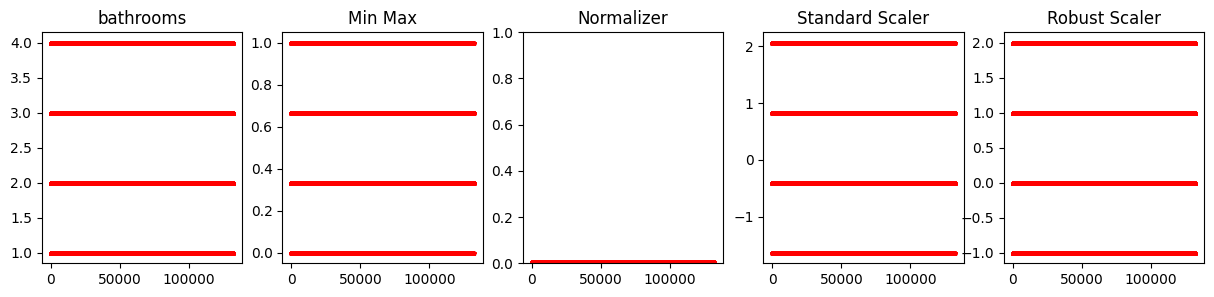

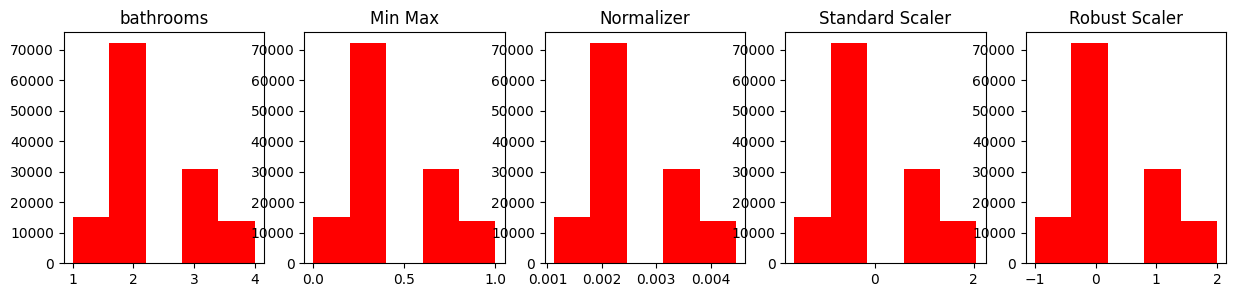

In [451]:
# Conversion of numpy arrays (vectors) into Dataframes to graph them.
data_min_max = pd.DataFrame(data_min_max, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
data_normalized = pd.DataFrame(data_normalized, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
c = pd.DataFrame(data_standardized, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
data_standardized_robust = pd.DataFrame(data_standardized_robust, columns=['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])

# Creation of a figure of 5 subplots to compare the methods appleid.
fig = plt.figure(figsize = (15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# Personalization of the different subplots.
ax1.set_title('bathrooms')
ax1.plot(df_num['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax2.set_title('Min Max')
ax2.plot(data_min_max['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax3.set_title('Normalizer')
ax3.plot(data_normalized['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)
ax3.set_ylim(0, 1)

ax4.set_title('Standard Scaler')
ax4.plot(data_standardized['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

ax5.set_title('Robust Scaler')
ax5.plot(data_standardized_robust['bathrooms'], linewidth = 0, marker = '*', color='r', markersize = 3)

plt.show()

# Creation of a figure of 5 subplots to illustrate the histograms.
fig = plt.figure(figsize = (15,3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title('bathrooms')
ax1.hist(df_num['bathrooms'], linewidth = 0, color='r', bins=5)

ax2.set_title('Min Max')
ax2.hist(data_min_max['bathrooms'], linewidth = 0, color='r', bins=5)

ax3.set_title('Normalizer')
ax3.hist(data_normalized['bathrooms'], linewidth = 0, color='r', bins=5)

ax4.set_title('Standard Scaler')
ax4.hist(data_standardized['bathrooms'], linewidth = 0, color='r', bins=5)

ax5.set_title('Robust Scaler')
ax5.hist(data_standardized_robust['bathrooms'], linewidth = 0, color='r', bins=5)

plt.show()

In [ ]:
# We graph the information for bathrooms as is the feature with higher correlation with the column target.
# As we can see the data has been normalized and it all look the same. However we can see that in the histograms the scale range has change. In the scatter plots that looks like line in the y axis we can see tjat the data have different scales.

In [452]:
# Dataframe checkpoint
df4 = train.copy()

In [453]:
df4

,start_date,end_date,latitud,longitud,departamento,municipio,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,target
0,2020-12-14,2022-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,897.0,300.0,Casa,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,4.0,4.0,2.0,897.0,300.0,Casa,0
3,2020-10-06,2020-10-07,7.000008,-75.500009,Antioquia,Medellín,3.0,3.0,2.0,108.0,113.0,Apartamento,0
4,2020-12-17,2021-03-04,5.049009,-75.506802,Caldas,Manizales,3.0,3.0,2.0,108.0,113.0,Apartamento,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131930,2020-12-19,2021-03-02,7.000008,-73.250009,Santander,Bucaramanga,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131931,2020-11-30,2021-05-19,7.064000,-73.106000,Santander,Floridablanca,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131932,2020-08-11,2020-08-11,4.636047,-74.147480,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0
131933,2020-10-27,2022-12-31,4.649682,-74.161950,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,108.0,113.0,Apartamento,0


## Categorical Data

In [276]:
# As the categorical data in this dataset is nominal there is non a order relationsipwithin the values. Therefore, our categorical features will be changed
# for numerical data using the preprocessing tool One Hot Encoder.
from sklearn.preprocessing import OneHotEncoder

In [277]:
# We create a variable with the function to encode categorical features as a 1-0 numeric array.
ohe = OneHotEncoder(handle_unknown='ignore')

# As the input to this transformer should be an array-like of integers or strings, we transform the categorical featurres in arrays.
# After that we create a dataframe with the results of the transformation to later add it to the dataframe standardized.
categorical_encoded = pd.DataFrame(ohe.fit_transform(np.array(train[['departamento', 'municipio', 'property_type']])).toarray())

# Our standardized dataframes has 131935 rows and 7 columns.
data_standardized.shape

# Our new dataframe has the following shape: 131935 rows and 245 columns.
categorical_encoded.shape

(131935, 245)

In [278]:
# Our working dataframe have now 131935 rows and 252 columns.
data_standardized.join(categorical_encoded).shape

(131935, 252)

In [279]:
# We merge the two dataframes.
working_df = data_standardized.join(categorical_encoded)

# However, we have now a Dataframe witih over 250 columns and we enter to the place where more information is less (curse of dimensionality), 
# hence we need to select the relevant feautrues to train our ML model to predict the correct outcomes.
# This problem happens because as we add more features (but not more records for the model), the data becomes more scattered, leading to overfitting and
# decreasing the effectiveness of our model to predict correctly.
working_df.shape

(131935, 252)

In [280]:
working_df.head(5)

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered,0,1,2,...,235,236,237,238,239,240,241,242,243,244
0,0.430900,-0.419325,1.336041,1.317504,2.060197,1.445353,1.430426,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.546046,1.004901,-0.552498,-0.495987,-0.404001,-0.689847,-0.683008,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.555120,1.045868,1.336041,1.317504,-0.404001,1.445353,1.430426,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.956915,-0.350919,-0.552498,-0.495987,-0.404001,-0.689847,-0.683008,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.330719,-0.357374,-0.552498,-0.495987,-0.404001,-0.689847,-0.683008,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# For that we need to reduce the amount of dimentions that we feed our model.
# We do this using the technic PCA principal component analysis.

In [406]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [407]:
data_to_work = pd.DataFrame(pca.fit_transform(working_df))

c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# Unfortunately, assessing the performance of the different ML models using the categorical values transformed with One Hot Encoder and PCA, did not improve the models metrics. The data needs to be continuously cleaned.

In [506]:
# Data for which the models performed better
train.to_csv('Train_pipeline')
data_standardized.to_csv('data_standardized_pipeline')

## ML Models

In [418]:
# We import the libraries needed.

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


In [456]:
# To define the model we are going to use the data_standarized Dataframe that is the Train dataset that is standardized.
X = train[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = train['target']

from sklearn.model_selection import train_test_split
# We are going to split our data in Train and Test to assess our model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y)

# The train data will be our dev for experimenting with different models and hyperparameters, and the test set will se our hold-out.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(92354, 7) (39581, 7) (92354,) (39581,)


## Ensambling

### Bosting

In [397]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [410]:
clf_xgb = xgb.XGBClassifier(n_estimators=150,
                            seed=42, use_label_encoder= False)
                            
# Entrenamos
clf_xgb.fit(X_train, y_train)

c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [411]:
y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

# Evaluamos
print('Accuracy en train:', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy en test:', metrics.accuracy_score(y_test, y_test_pred))

print('Recall en train:', metrics.recall_score(y_train, y_train_pred))
print('Recall en test:', metrics.recall_score(y_test, y_test_pred))



Accuracy en train: 0.8958247612447755
Accuracy en test: 0.8857280008084687
Recall en train: 0.38092345078979345
Recall en test: 0.3423104181431609


### Random Forests

In [473]:
# Instancing the model.
# We are going to let the model to overfit, taking 2/3 of the data randomly allowing it to repeat records.
forest_model = RandomForestClassifier(n_estimators = 100, max_depth = None, criterion='gini', max_features='sqrt', bootstrap = True, max_samples=2/3, oob_score=True, n_jobs=-1)

In [474]:
# Training the mode.
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6666666666666666, n_jobs=-1,
                       oob_score=True)

In [475]:
# Predicting tags with the model for the target column.
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

# As we can see the model is good for obtaining the correct classification when all the data is taking into accound. However, its predictions are weak for classifying the
# the expensive properties over all the cases we are trying to identify..
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

# Thiese are the meassurements we are interested in.
print(metrics.recall_score(y_train, y_train_pred))
print(metrics.recall_score(y_test, y_test_pred))

0.9632717586677351
0.9302443091382229
0.8257897934386391
0.6925939050318922


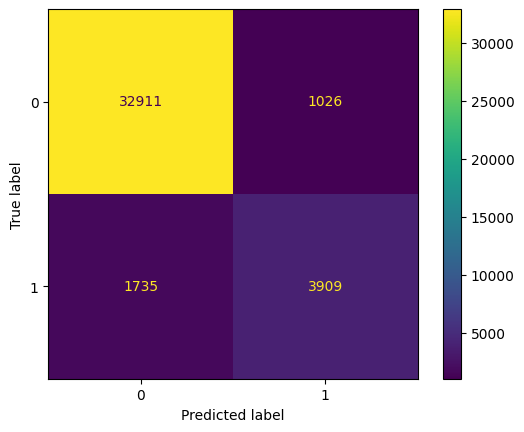

In [476]:
# We obtain the confussion matrix for the test data and plot it.
matrix = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [477]:
# With classification report we obtain a resume with the main classification metrics that allow us to see how our model is performing.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     33937
           1       0.79      0.69      0.74      5644

    accuracy                           0.93     39581
   macro avg       0.87      0.83      0.85     39581
weighted avg       0.93      0.93      0.93     39581



In [478]:
forest_model.oob_score_

0.928070251423869

In [ ]:
# The feaures that have more relevance in the target column is latitude and longitude
forest_model.feature_importances_

array([1.30554446e-02, 9.50365295e-03, 9.73502061e-03, 3.24899010e-02,
       8.49038759e-03, 1.52361958e-02, 1.09416070e-02, 6.91322981e-03,
       5.21595819e-03, 6.96440775e-03, 4.77445645e-03, 4.13656949e-03,
       4.26058122e-03, 5.20868094e-03, 6.20300368e-03, 1.92919068e-02,
       1.14444741e-02, 4.93869564e-03, 6.01950884e-03, 6.58117088e-03,
       5.07524369e-03, 4.99428193e-03, 4.86727410e-03, 5.00624397e-03,
       7.69330276e-03, 4.13964372e-03, 4.20102498e-03, 3.81885782e-03,
       3.74990710e-03, 4.52643646e-03, 4.15023156e-03, 4.04522328e-03,
       5.76401330e-03, 3.43374984e-03, 3.71577831e-03, 4.88698801e-03,
       4.48925031e-03, 7.29787392e-03, 4.23947378e-03, 7.37992615e-03,
       3.88379220e-03, 4.05057760e-03, 3.39378754e-03, 3.87403275e-03,
       4.32141395e-03, 4.75008846e-03, 3.77253898e-03, 3.56849823e-03,
       4.07211844e-03, 3.93758359e-03, 3.76487866e-03, 3.76137001e-03,
       5.14644740e-03, 3.76278575e-03, 4.11682573e-03, 4.84318333e-03,
      

In [ ]:
from sklearn.metrics import recall_score

In [479]:
train_recall = []
test_recall = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_recall.append(metrics.recall_score(y_train, y_train_pred))
    test_recall.append(metrics.recall_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_recall = np.array(train_recall)
test_recall = np.array(test_recall)
oob_scores = np.array(oob_scores)

1
2


c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3
4


c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5
10


c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25


c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


50
100
250
500
1000


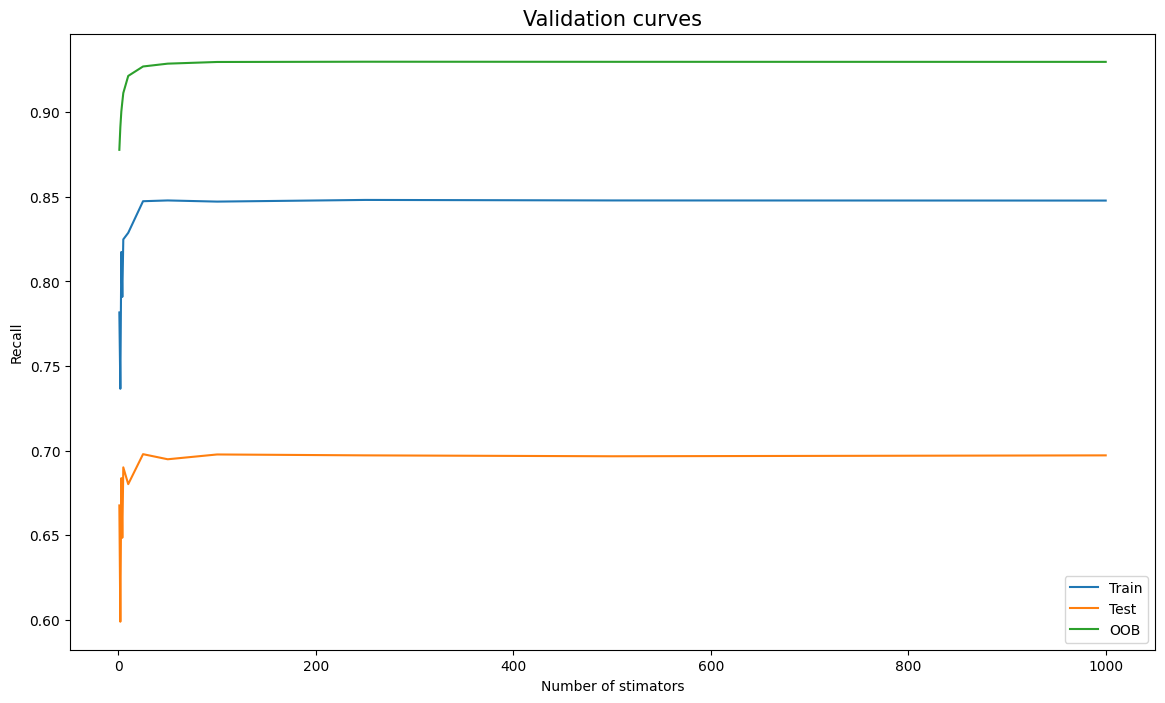

In [480]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_recall, label = 'Train')
plt.plot(N_estimadores, test_recall, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Number of stimators')
plt.ylabel('Recall')
plt.legend()
plt.title('Validation curves', fontsize = 15)
# plt.xlim(0,50)
plt.show()

# With less than 25 tress we obtain the maximun value for recall score.

### Tree

In [489]:
# We define the model
dtc_model = DecisionTreeClassifier(max_depth=12, random_state=42)

# Trian it.
dtc_model.fit(X_train, y_train)

# Obtain some metrics.
print('Number of features:',dtc_model.max_features_)
print('Preponderance of the variables:',dtc_model.feature_importances_)
# Where we can see that Bathroom is the most important feature.

Number of features: 7
Preponderance of the variables: [0.33499442 0.25037506 0.00887983 0.01138586 0.34703068 0.01249239
 0.03484175]


In [490]:
# Predicting instances to evaluate the model.
y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

In [491]:
# We calculate the accuracy and the recall of the model with train data.
print('The accuracy of the model is',accuracy_score(y_train, y_train_pred))
print('The recall of the model is',recall_score(y_train, y_train_pred))

# # Also with test data.
print('The accuracy of the model is',accuracy_score(y_test, y_test_pred))
print('The recall of the model is',recall_score(y_test, y_test_pred))

The accuracy of the model is 0.9236091560733699
The recall of the model is 0.6177855407047388
The accuracy of the model is 0.9310022485535989
The recall of the model is 0.6972005669737774


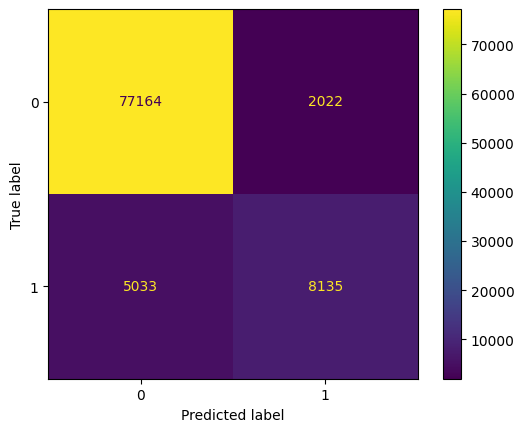

In [492]:
from sklearn.metrics import confusion_matrix

# Using confusion_matrix we obtain a binary classification matrix where we can see the predicted instances.
matrix = confusion_matrix(y_train, y_train_pred)

from sklearn.metrics import ConfusionMatrixDisplay

# We plot the confusion matrix
cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [493]:
from sklearn.metrics import classification_report

# Using classification report we obtain several measurments to see how our model is performing.
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     79186
           1       0.80      0.62      0.70     13168

    accuracy                           0.92     92354
   macro avg       0.87      0.80      0.83     92354
weighted avg       0.92      0.92      0.92     92354



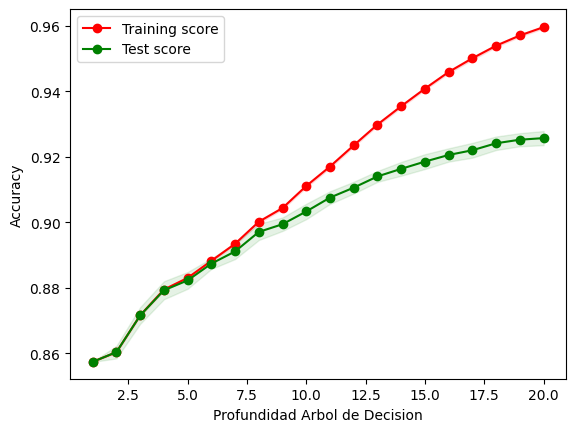

In [488]:
tree_train_score_mean = []
tree_train_score_std = []
tree_test_score_mean = []
tree_test_score_std =[]

deepness = np.arange(1,21)

for deep in deepness:
    
    tcmcv = DecisionTreeClassifier(max_depth = deep)
    tree_scores = cross_validate(tcmcv, X, y, cv = 10, return_train_score=True, n_jobs = -1) 
    
    tree_train_score_mean.append(tree_scores['train_score'].mean())
    tree_train_score_std.append(tree_scores['train_score'].std())
     
    tree_test_score_mean.append(tree_scores['test_score'].mean())
    tree_test_score_std.append(tree_scores['test_score'].std())
    

tree_train_score_mean = np.array(tree_train_score_mean)
tree_train_score_std = np.array(tree_train_score_std)

tree_test_score_mean = np.array(tree_test_score_mean)
tree_test_score_std = np.array(tree_test_score_std)

plt.fill_between(deepness, tree_train_score_mean - tree_train_score_std,
                 tree_train_score_mean + tree_train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(deepness, tree_test_score_mean - tree_test_score_std,
                 tree_test_score_mean + tree_test_score_std, alpha=0.1, color="g")

plt.plot(deepness, tree_train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(deepness, tree_test_score_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

### K neighbours.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [494]:
# Instancing the model.
clf = KNeighborsClassifier(n_neighbors=5)

In [495]:
# Training it.
clf.fit(X,y)

KNeighborsClassifier()

In [500]:
# Predicting instances.
y_train_pred = clf.predict(X)

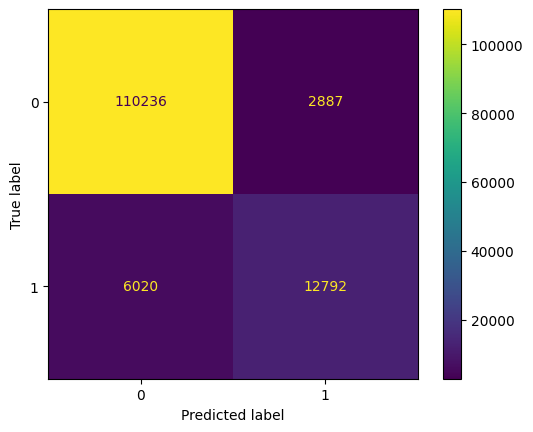

In [497]:
matrix = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [499]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     79186
           1       0.80      0.62      0.70     13168

    accuracy                           0.92     92354
   macro avg       0.87      0.80      0.83     92354
weighted avg       0.92      0.92      0.92     92354



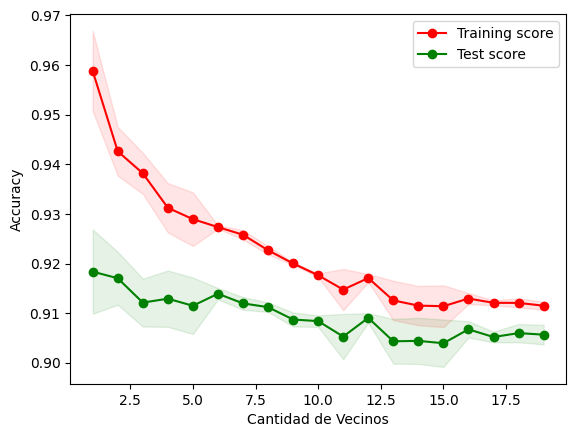

In [ ]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

### test.csv

In [ ]:
# We Apply the model to the test to obtain the predictions.

In [ ]:
test_corrected = pd.read_csv('test_corrected')
test_corrected.drop('Unnamed: 0',axis=1,inplace=True)
test_corrected

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.581880,1.011393,-0.245778,-0.205585,0.334839,-0.184358,-0.125843
1,0.487954,-0.384871,-0.245778,-0.205585,0.334839,-0.377981,0.002527
2,0.140069,-0.510654,0.642990,0.580032,-1.207870,-0.034238,0.002527
3,0.113650,-0.439733,-2.023312,-1.776818,-0.436515,0.576226,0.002527
4,0.487954,-0.384871,0.642990,0.580032,-0.436515,-0.034238,0.002527
...,...,...,...,...,...,...,...
65845,0.118338,-0.482207,-0.245778,-0.205585,-0.436515,-0.377981,0.002527
65846,-0.431910,-0.397027,-0.245778,-0.205585,-1.207870,-0.377981,0.002527
65847,-0.420920,-0.551992,1.531757,1.365649,-0.436515,-0.036734,0.002527
65848,0.553061,1.939965,-0.245778,-0.205585,-0.436515,-0.377981,0.002527


In [ ]:
X_test = test_corrected[['latitud','longitud', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

In [ ]:
y_test_pred = dtc_model.predict(X_test)

In [ ]:
y_test_pred_k = clf.predict(X_test)

test_precdictions = pd.DataFrame()

test_precdictions['Pred'] = y_test_pred_k
test_precdictions

test_precdictions.to_csv('oscarmarinoa.csv2', index=False)

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
test_precdictions = pd.DataFrame()

In [ ]:
test_precdictions['Pred'] = y_test_pred
test_precdictions

In [ ]:
test_precdictions.to_csv('oscarmarinoa.csv', index=False)